# 逻辑回归

## 导入数据(乳腺癌数据集)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer #乳腺癌数据集
import matplotlib.pyplot as plt

In [2]:
X =load_breast_cancer().data

In [3]:
Y =load_breast_cancer().target

In [4]:
X.shape

(569, 30)

In [5]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
pd.DataFrame(X) #可以考虑去量纲(标准化)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 建模

In [7]:
from sklearn.linear_model import LogisticRegression as LR #逻辑回归
from sklearn.model_selection import train_test_split

In [ ]:
# LR(
#     penalty='l2', # l2正则化---岭回归   l1正则化---lasso  默认l2
#     *,
#     dual=False,
#     tol=0.0001,
#     C=1.0,    # C越小表示惩罚力度越大，C越大惩罚力度越小
#     fit_intercept=True,
#     intercept_scaling=1,
#     class_weight=None,
#     random_state=None,
#     solver='lbfgs', # 梯度下降的方式
#     max_iter=100, # 梯度下降会有迭代次数
#     multi_class='auto',
#     verbose=0,
#     warm_start=False,
#     n_jobs=None,
#     l1_ratio=None,
# )

# LogisticRegression，一共有14个参数：
参数说明如下：
    penalty：惩罚项，str类型，可选参数为l1和l2，默认为l2。用于指定惩罚项中使用的规范。newton-cg、sag和lbfgs求解算法只支持L2规范。L1G规范假设的是模型的参数满足拉普拉斯分布，L2假设的模型参数满足高斯分布，所谓的范式就是加上对参数的约束，使得模型更不会过拟合(overfit)，但是如果要说是不是加了约束就会好，这个没有人能回答，只能说，加约束的情况下，理论上应该可以获得泛化能力更强的结果。
    dual：对偶或原始方法，bool类型，默认为False。对偶方法只用在求解线性多核(liblinear)的L2惩罚项上。当样本数量>样本特征的时候，dual通常设置为False。
    tol：停止求解的标准，float类型，默认为1e-4。就是求解到多少的时候，停止，认为已经求出最优解。
    c：正则化系数λ的倒数，float类型，默认为1.0。必须是正浮点型数。像SVM一样，越小的数值表示越强的正则化。
    fit_intercept：是否存在截距或偏差，bool类型，默认为True。
    intercept_scaling：仅在正则化项为”liblinear”，且fit_intercept设置为True时有用。float类型，默认为1。
    class_weight：用于标示分类模型中各种类型的权重，可以是一个字典或者’balanced’字符串，默认为不输入，也就是不考虑权重，即为None。如果选择输入的话，可以选择balanced让类库自己计算类型权重，或者自己输入各个类型的权重。举个例子，比如对于0,1的二元模型，我们可以定义class_weight={0:0.9,1:0.1}，这样类型0的权重为90%，而类型1的权重为10%。如果class_weight选择balanced，那么类库会根据训练样本量来计算权重。某种类型样本量越多，则权重越低，样本量越少，则权重越高。当class_weight为balanced时，类权重计算方法如下：n_samples / (n_classes * np.bincount(y))。n_samples为样本数，n_classes为类别数量，np.bincount(y)会输出每个类的样本数，例如y=[1,0,0,1,1],则np.bincount(y)=[2,3]。
        那么class_weight有什么作用呢？
            在分类模型中，我们经常会遇到两类问题：
            第一种是误分类的代价很高。比如对合法用户和非法用户进行分类，将非法用户分类为合法用户的代价很高，我们宁愿将合法用户分类为非法用户，这时可以人工再甄别，但是却不愿将非法用户分类为合法用户。这时，我们可以适当提高非法用户的权重。
            第二种是样本是高度失衡的，比如我们有合法用户和非法用户的二元样本数据10000条，里面合法用户有9995条，非法用户只有5条，如果我们不考虑权重，则我们可以将所有的测试集都预测为合法用户，这样预测准确率理论上有99.95%，但是却没有任何意义。这时，我们可以选择balanced，让类库自动提高非法用户样本的权重。提高了某种分类的权重，相比不考虑权重，会有更多的样本分类划分到高权重的类别，从而可以解决上面两类问题。
    random_state：随机数种子，int类型，可选参数，默认为无，仅在正则化优化算法为sag,liblinear时有用。
    solver：优化算法选择参数，只有五个可选参数，即newton-cg,lbfgs,liblinear,sag,saga。默认为liblinear。solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
        liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
        lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
        newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
        sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。
        saga：线性收敛的随机优化算法的的变重。
        总结：
            liblinear适用于小数据集，而sag和saga适用于大数据集因为速度更快。
            对于多分类问题，只有newton-cg,sag,saga和lbfgs能够处理多项损失，而liblinear受限于一对剩余(OvR)。啥意思，就是用liblinear的时候，如果是多分类问题，得先把一种类别作为一个类别，剩余的所有类别作为另外一个类别。一次类推，遍历所有类别，进行分类。
            newton-cg,sag和lbfgs这三种优化算法时都需要损失函数的一阶或者二阶连续导数，因此不能用于没有连续导数的L1正则化，只能用于L2正则化。而liblinear和saga通吃L1正则化和L2正则化。
            同时，sag每次仅仅使用了部分样本进行梯度迭代，所以当样本量少的时候不要选择它，而如果样本量非常大，比如大于10万，sag是第一选择。但是sag不能用于L1正则化，所以当你有大量的样本，又需要L1正则化的话就要自己做取舍了。要么通过对样本采样来降低样本量，要么回到L2正则化。
            从上面的描述，大家可能觉得，既然newton-cg, lbfgs和sag这么多限制，如果不是大样本，我们选择liblinear不就行了嘛！错，因为liblinear也有自己的弱点！我们知道，逻辑回归有二元逻辑回归和多元逻辑回归。对于多元逻辑回归常见的有one-vs-rest(OvR)和many-vs-many(MvM)两种。而MvM一般比OvR分类相对准确一些。郁闷的是liblinear只支持OvR，不支持MvM，这样如果我们需要相对精确的多元逻辑回归时，就不能选择liblinear了。也意味着如果我们需要相对精确的多元逻辑回归不能使用L1正则化了。
    max_iter：算法收敛最大迭代次数，int类型，默认为10。仅在正则化优化算法为newton-cg, sag和lbfgs才有用，算法收敛的最大迭代次数。
    multi_class：分类方式选择参数，str类型，可选参数为ovr和multinomial，默认为ovr。ovr即前面提到的one-vs-rest(OvR)，而multinomial即前面提到的many-vs-many(MvM)。如果是二元逻辑回归，ovr和multinomial并没有任何区别，区别主要在多元逻辑回归上。
        OvR和MvM有什么不同*？*
            OvR的思想很简单，无论你是多少元逻辑回归，我们都可以看做二元逻辑回归。具体做法是，对于第K类的分类决策，我们把所有第K类的样本作为正例，除了第K类样本以外的所有样本都作为负例，然后在上面做二元逻辑回归，得到第K类的分类模型。其他类的分类模型获得以此类推。
            而MvM则相对复杂，这里举MvM的特例one-vs-one(OvO)作讲解。如果模型有T类，我们每次在所有的T类样本里面选择两类样本出来，不妨记为T1类和T2类，把所有的输出为T1和T2的样本放在一起，把T1作为正例，T2作为负例，进行二元逻辑回归，得到模型参数。我们一共需要T(T-1)/2次分类。
            可以看出OvR相对简单，但分类效果相对略差（这里指大多数样本分布情况，某些样本分布下OvR可能更好）。而MvM分类相对精确，但是分类速度没有OvR快。如果选择了ovr，则4种损失函数的优化方法liblinear，newton-cg,lbfgs和sag都可以选择。但是如果选择了multinomial,则只能选择newton-cg, lbfgs和sag了。
    verbose：日志冗长度，int类型。默认为0。就是不输出训练过程，1的时候偶尔输出结果，大于1，对于每个子模型都输出。
    warm_start：热启动参数，bool类型。默认为False。如果为True，则下一次训练是以追加树的形式进行（重新使用上一次的调用作为初始化）。
    n_jobs：并行数。int类型，默认为1。1的时候，用CPU的一个内核运行程序，2的时候，用CPU的2个内核运行程序。为-1的时候，用所有CPU的内核运行程序。


In [9]:
lr1 = LR(penalty='l1',solver='liblinear', #l1 正则化   #liblinear 坐标下降法
                       C= 0.5,
                       max_iter=1000).fit(X,Y)

lr2 = LR(penalty='l2',solver='liblinear', #l2 正则化
                       C= 0.5,
                       max_iter=1000).fit(X,Y)

In [10]:
lr1.score(X,Y),lr2.score(X,Y)

(0.9578207381370826, 0.9560632688927944)

- L1正则化可以对特征进行筛选

In [11]:
lr1.coef_ # w 参数值 

array([[ 4.02294112,  0.03230065, -0.14029106, -0.01623461,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50548366,  0.        , -0.07127738,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24630131, -0.12882053, -0.01439898,  0.        ,
         0.        , -2.01842288,  0.        ,  0.        ,  0.        ]])

- 对当前的数据集来讲，使用L1，特征减少至1/3，精度还是控制96%，说明剩下的特征是比较重要的特征，可以很好体现X与Y之间的关系

In [31]:
lr2.coef_ # w 参数值 

array([[ 1.60607308e+00,  9.80640554e-02,  5.51538489e-02,
        -4.80814634e-03, -9.75651764e-02, -2.97883054e-01,
        -4.58633029e-01, -2.27937385e-01, -1.40149921e-01,
        -1.87015384e-02,  1.19850184e-02,  8.61188612e-01,
         1.13302087e-01, -9.32795489e-02, -1.04386381e-02,
        -1.73386376e-02, -5.21391606e-02, -2.75748725e-02,
        -2.79489851e-02,  1.17683009e-03,  1.22026471e+00,
        -2.96641459e-01, -1.71806509e-01, -2.18869267e-02,
        -1.79870166e-01, -8.58359341e-01, -1.15630505e+00,
        -4.37780410e-01, -4.31445382e-01, -8.46315361e-02]])

- 特征越多，模型复杂度越高，更容易将噪声学习到模型中，导致过拟合(模型泛化能力下降)，模型特征越少（不能太过），泛化能力越强

In [36]:
#对每一行进行预测
lr2.predict_proba(X)  #    0  1
#.sum(axis=1)

array([[1.00000000e+00, 7.64542333e-15],
       [9.99999966e-01, 3.44228638e-08],
       [9.99999886e-01, 1.14323500e-07],
       ...,
       [9.97386529e-01, 2.61347136e-03],
       [1.00000000e+00, 1.77462887e-10],
       [5.11926033e-02, 9.48807397e-01]])

## 绘制学习曲线

In [41]:
# 切分数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)

In [43]:
#查看C在L1、L2下训练集和测试集的表现
l1 = []
l2 = []

l1test = []
l2test = []

for i in np.linspace(0.05,1,19):
    #实例化模型并训练
    lrl1 = LR(penalty='l1',solver='liblinear',C=i,max_iter=1000).fit(Xtrain,Ytrain)
    lrl2 = LR(penalty='l2',solver='liblinear',C=i,max_iter=1000).fit(Xtrain,Ytrain)
    
    # 记录训练集的分数
    l1.append(lrl1.score(Xtrain,Ytrain))
    l2.append(lrl2.score(Xtrain,Ytrain))
    
    # 记录测试集的分数
    l1test.append(lrl1.score(Xtest,Ytest))
    l2test.append(lrl2.score(Xtest,Ytest))


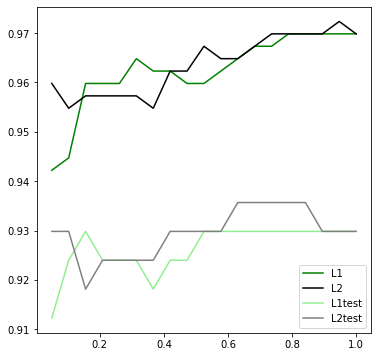

In [46]:
# 画图

graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"] 

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪⾥?4表示，右下⻆
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


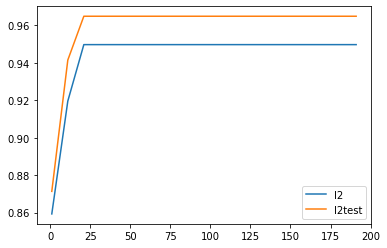

In [56]:
# 确定C=0.9  关于最大迭代次数绘制学习曲线
l2 = []
l2test = []

for i in range(1,201,10):
    lrl2 = LR(penalty='l2',solver='liblinear',C=0.9,max_iter=i).fit(Xtrain,Ytrain)
    
    l2.append(lrl2.score(Xtrain,Ytrain))
    l2test.append(lrl2.score(Xtest,Ytest))
    
plt.plot(range(1,201,10),l2,label='l2')
plt.plot(range(1,201,10),l2test,label='l2test')
plt.legend(loc=4)


## 网格搜索-确定最优参数

In [57]:
#导包
from sklearn.model_selection import GridSearchCV #网格搜索
from sklearn.preprocessing import StandardScaler #标准化

In [59]:
data = pd.DataFrame(X,columns= load_breast_cancer().feature_names)
data['label'] = Y

In [60]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [61]:
#划分数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)

#对训练集和测试集做标准化---去量纲
std = StandardScaler().fit(Xtrain)
Xtrain_ = std.transform(Xtrain)
Xtest_ = std.transform(Xtest)


In [65]:
#在l2范式下，判断C和solver的最优值
p = {
    'C':list(np.linspace(0.05,1,19)),
    'solver':['liblinear','sag','newton-cg','lbfgs']
}

model = LR(penalty='l2',max_iter=10000)

GS = GridSearchCV(model,p,cv=5)
GS.fit(Xtrain_,Ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.05, 0.10277777777777777, 0.15555555555555556,
                               0.20833333333333331, 0.2611111111111111,
                               0.3138888888888889, 0.36666666666666664,
                               0.41944444444444445, 0.4722222222222222, 0.525,
                               0.5777777777777778, 0.6305555555555556,
                               0.6833333333333333, 0.7361111111111112,
                               0.788888888888889, 0.8416666666666667,
                               0.8944444444444445, 0.9472222222222223, 1.0],
                         'solver': ['liblinear', 'sag', 'newton-cg', 'lbfgs']})

In [66]:
GS.best_score_

0.9874683544303797

In [67]:
GS.best_params_

{'C': 0.3138888888888889, 'solver': 'sag'}

In [76]:
#将最优参数重新用于实例化模型，查看训练集和测试集下的分数
model = LR(penalty='l2',
           max_iter=10000,
           C=GS.best_params_['C'],
           solver=GS.best_params_['solver'])  #sag 三种通过导数计算的方式是不能l1正则化的

In [77]:
model.fit(Xtrain_,Ytrain)

LogisticRegression(C=0.3138888888888889, max_iter=10000, solver='sag')

In [78]:
model.score(Xtrain_,Ytrain),model.score(Xtest_,Ytest)

(0.9874371859296482, 0.9649122807017544)